# Analyze  NBA Player statistics

## Introduction

We analyze the 2017-2018 NBA players data. The data was downloaded from [basketball-reference](https://www.basketball-reference.com/).

## Project Goal

What you want to do with this project?

explain your ideas and goals here.

## Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Pick a style
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman"

## Glossary

There are 30 columns in the dataset, and their meanings are listed as below. 

* Rk -- Rank (an unique index for each player, it may be duplicated if a player played for multiple teams in a single season).

* Player -- Player name.

* Pos -- Position.

* Age -- Age of Player at the start of February 1st of that season.

* Tm -- Team. 

* G -- Games.

* GS -- Games Started.

* MP -- Minutes Played Per Game.

* FG -- Field Goals Per Game.

* FGA -- Field Goal Attempts Per Game.

* FG% -- Field Goal Percentage.

* 3P -- 3-Point Field Goals Per Game.

* 3PA -- 3-Point Field Goal Attempts Per Game.

* 3P% -- FG% on 3-Pt FGAs.

* 2P -- 2-Point Field Goals Per Game.

* 2PA -- 2-Point Field Goal Attempts Per Game.

* 2P% -- FG% on 2-Pt FGAs.

* eFG% -- Effective Field Goal Percentage: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

* FT -- Free Throws Per Game.

* FTA -- Free Throw Attempts Per Game.

* FT% -- Free Throw Percentage.

* ORB -- Offensive Rebounds Per Game.

* DRB -- Defensive Rebounds Per Game.

* TRB -- Total Rebounds Per Game.

* AST -- Assists Per Game.

* STL -- Steals Per Game.

* BLK -- Blocks Per Game.

* TOV -- Turnovers Per Game.

* PF -- Personal Fouls Per Game.

* PS/G -- Points Per Game.

In [2]:
# load the per game stats for the 2017-2018 season players
data = pd.read_csv('./data/2017-18-NBA-Player-Stats-Per-Game.csv')
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [3]:
data.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PS/G      float64
dtype: object

## Data cleaning

In [4]:
# clean the 'Player' column
data['Player'] = data['Player'].apply(lambda x: x.split("\\")[0])


In [5]:
# the total number of players is 540
print(data['Rk'].max())
# the total number of rows is 664
print(data.shape)
# a few players played for multiple teams in a single season, only the first row should be used.
# for example, "Dwyane Wade", the first row is the sum of the rest rows for these players, we only take the 1st row
print(data[data["Player"]=="Dwyane Wade"])

data_players = pd.DataFrame()
# the following method works, here is another possible method: https://stackoverflow.com/questions/32093829/pythonpandas-removing-duplicates-based-on-two-columns-keeping-row-with-max-va
for i in range(1,data['Rk'].max()+1): # the first Rank is "1", not "0"
    data_temp = data[data['Rk'] == i]
    # we only pick the first row of the temporary dataframe
    data_players=data_players.append(data_temp.iloc[0])[data_temp.columns.tolist()]

data_players.head()

540
(664, 30)
      Rk       Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  ORB  \
608  495  Dwyane Wade  SG   36  TOT  67   3  22.9  4.5  10.2  ...  0.714  0.7   
609  495  Dwyane Wade  SG   36  CLE  46   3  23.2  4.3   9.5  ...  0.701  0.8   
610  495  Dwyane Wade  SG   36  MIA  21   0  22.2  4.8  11.8  ...  0.745  0.5   

     DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
608  3.0  3.8  3.4  0.9  0.7  2.1  1.9  11.4  
609  3.1  3.9  3.5  0.9  0.7  2.0  1.8  11.2  
610  2.9  3.4  3.1  0.9  0.7  2.3  1.9  12.0  

[3 rows x 30 columns]


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1.0,Alex Abrines,SG,24.0,OKC,75.0,8.0,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2.0,Quincy Acy,PF,27.0,BRK,70.0,8.0,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3.0,Steven Adams,C,24.0,OKC,76.0,76.0,32.7,5.9,9.4,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4.0,Bam Adebayo,C,20.0,MIA,69.0,19.0,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5.0,Arron Afflalo,SG,32.0,ORL,53.0,3.0,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [6]:
#data_players.reset_index(inplace=True, drop=True)
print(data_players)

        Rk         Player Pos   Age   Tm     G    GS    MP   FG  FGA  ...  \
0      1.0   Alex Abrines  SG  24.0  OKC  75.0   8.0  15.1  1.5  3.9  ...   
1      2.0     Quincy Acy  PF  27.0  BRK  70.0   8.0  19.4  1.9  5.2  ...   
2      3.0   Steven Adams   C  24.0  OKC  76.0  76.0  32.7  5.9  9.4  ...   
3      4.0    Bam Adebayo   C  20.0  MIA  69.0  19.0  19.8  2.5  4.9  ...   
4      5.0  Arron Afflalo  SG  32.0  ORL  53.0   3.0  12.9  1.2  3.1  ...   
..     ...            ...  ..   ...  ...   ...   ...   ...  ...  ...  ...   
657  536.0    Cody Zeller   C  25.0  CHO  33.0   0.0  19.0  2.6  4.7  ...   
658  537.0   Tyler Zeller   C  28.0  TOT  66.0  34.0  16.8  2.8  5.1  ...   
661  538.0    Paul Zipser  SF  23.0  CHI  54.0  12.0  15.3  1.5  4.3  ...   
662  539.0     Ante Zizic   C  21.0  CLE  32.0   2.0   6.7  1.5  2.1  ...   
663  540.0    Ivica Zubac   C  20.0  LAL  43.0   0.0   9.5  1.4  2.8  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
0    0.848  0.3 

In [7]:
print(data_players[data_players["Player"]=="Dwyane Wade"])

        Rk       Player Pos   Age   Tm     G   GS    MP   FG   FGA  ...  \
608  495.0  Dwyane Wade  SG  36.0  TOT  67.0  3.0  22.9  4.5  10.2  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
608  0.714  0.7  3.0  3.8  3.4  0.9  0.7  2.1  1.9  11.4  

[1 rows x 30 columns]


In [8]:
# let's check if the player did not play at all for the season
# all player at lease played one game 
print(data_players[data_players["G"] == 0.0])

Empty DataFrame
Columns: [Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PS/G]
Index: []

[0 rows x 30 columns]


In [9]:
# we will drop the "Tm" (Team) column, since "Tm" = "TOT" doesn't apply for players who played for multiple teams 
# we will also drop the "Rk" column
data_players = data_players.drop(['Rk', 'Tm'], axis=1)
print(data_players)

            Player Pos   Age     G    GS    MP   FG  FGA    FG%   3P  ...  \
0     Alex Abrines  SG  24.0  75.0   8.0  15.1  1.5  3.9  0.395  1.1  ...   
1       Quincy Acy  PF  27.0  70.0   8.0  19.4  1.9  5.2  0.356  1.5  ...   
2     Steven Adams   C  24.0  76.0  76.0  32.7  5.9  9.4  0.629  0.0  ...   
3      Bam Adebayo   C  20.0  69.0  19.0  19.8  2.5  4.9  0.512  0.0  ...   
4    Arron Afflalo  SG  32.0  53.0   3.0  12.9  1.2  3.1  0.401  0.5  ...   
..             ...  ..   ...   ...   ...   ...  ...  ...    ...  ...  ...   
657    Cody Zeller   C  25.0  33.0   0.0  19.0  2.6  4.7  0.545  0.1  ...   
658   Tyler Zeller   C  28.0  66.0  34.0  16.8  2.8  5.1  0.560  0.2  ...   
661    Paul Zipser  SF  23.0  54.0  12.0  15.3  1.5  4.3  0.346  0.7  ...   
662     Ante Zizic   C  21.0  32.0   2.0   6.7  1.5  2.1  0.731  0.0  ...   
663    Ivica Zubac   C  20.0  43.0   0.0   9.5  1.4  2.8  0.500  0.0  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
0    0.848  0.3 

In [10]:
# drop rows if "PS/G" equal to "0.0"
#data_players[data_players["PS/G"] == 0.0]
#data_players= data_players[data_players["PS/G"] > 0.0]
#data_players.shape

In [11]:
data_players.isnull().sum()

Player     0
Pos        0
Age        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       49
2P         0
2PA        0
2P%       13
eFG%       3
FT         0
FTA        0
FT%       39
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PS/G       0
dtype: int64

In [12]:
# columns having nan data include:  3P%, FT%
# replace "FT%" NaN as "0.0", which means that the player never got a chance for free throw "FT" and "3P%"
data_players=data_players.fillna(0)
#data_players.isnull().sum() # double check


In [13]:
data_players['Pos'].value_counts()

SG       128
PG       111
C        105
PF       105
SF        88
SF-SG      2
PG-SG      1
Name: Pos, dtype: int64

In [28]:
# replace two-postion players postion with the first one
data_players['Pos']=data_players['Pos'].replace(['SF-SG'], 'SF')
data_players['Pos']=data_players['Pos'].replace(['PG-SG'], 'PG')
data_players['Pos'].value_counts()
data_players.shape

(540, 28)

In [29]:
# we'd better consider players who have played more than 8 games through the season(82 * 10%), total 82 games.
#print(len(data_players[data_players['G']<= 8]))
#players_below_8games = data_players[data_players['G']<= 8]
#players_above_8games =  data_players[data_players['G']> 8]
#players_above_8games['Pos'].value_counts()

In [30]:
# we will map our label string to numeric numbers
#Pos_dict = {
#    "SG": 1,
#    "PG": 2,
#    "C": 3,
#    "PF": 4,
#    "SF": 5
#}
#data_players['Pos']=data_players['Pos'].map(Pos_dict)
#data_players['Pos']=data_players['Pos'].astype('int64')
#data_players

## Data collinearity

We note that there is a [data collinearity](https://en.wikipedia.org/wiki/Multicollinearity) issue in the raw data. Data collinearity means that one variable can be predicted by other variable in the data. For our case, we know that (See the "Glossary" section for definition): 
* FT% = FT/FTA

* FG% = FG / FGA

* 3P% = 3P/3PA

* 2P% = 2P/2PA

* TRB = ORB + DRB

* eFG% = (FG + 0.5*3P)/FGA

* PS/G = 3P\*3 + 2P\*2




In [31]:
# Let's confirm the issue by checking the correlation coefficients between them.
data_corr = data_players['FT%'].corr(data_players['FTA'])
data_corr

0.3491603897709665

Data collinearity [makes it harder to interpret the model results](https://www.quora.com/Why-is-multicollinearity-bad-in-laymans-terms-In-feature-selection-for-a-regression-model-intended-for-use-in-prediction-why-is-it-a-bad-thing-to-have-multicollinearity-or-highly-correlated-independent-variables). We will address this issue by removing the derived variables (e.g., FT%) in our data, and keep the original records (FT, FTA).

In [32]:
cols_drop = ['FT%', 'FG%', '3P%', '2P%', 'TRB', 'eFG%', 'PS/G']
data_players_dropped = data_players.drop(cols_drop, axis=1)
data_players_dropped.shape
data_players_dropped.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,3P,3PA,...,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
0,Alex Abrines,SG,24.0,75.0,8.0,15.1,1.5,3.9,1.1,2.9,...,0.9,0.5,0.6,0.3,1.2,0.4,0.5,0.1,0.3,1.7
1,Quincy Acy,PF,27.0,70.0,8.0,19.4,1.9,5.2,1.5,4.2,...,1.0,0.7,0.9,0.6,3.1,0.8,0.5,0.4,0.9,2.1
2,Steven Adams,C,24.0,76.0,76.0,32.7,5.9,9.4,0.0,0.0,...,9.3,2.1,3.8,5.1,4.0,1.2,1.2,1.0,1.7,2.8
3,Bam Adebayo,C,20.0,69.0,19.0,19.8,2.5,4.9,0.0,0.1,...,4.8,1.9,2.6,1.7,3.8,1.5,0.5,0.6,1.0,2.0
4,Arron Afflalo,SG,32.0,53.0,3.0,12.9,1.2,3.1,0.5,1.3,...,1.7,0.4,0.5,0.1,1.2,0.6,0.1,0.2,0.4,1.1


In [33]:
data_players_dropped.columns.tolist()

['Player',
 'Pos',
 'Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 '3P',
 '3PA',
 '2P',
 '2PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF']

In [34]:
data_players_dropped.iloc[10]

Player    Al-Farouq Aminu
Pos                    PF
Age                    27
G                      69
GS                     67
MP                     30
FG                    3.3
FGA                   8.4
3P                    1.8
3PA                   4.9
2P                    1.5
2PA                   3.5
FT                    0.9
FTA                   1.2
ORB                   1.4
DRB                   6.2
AST                   1.2
STL                   1.1
BLK                   0.6
TOV                   1.1
PF                      2
Name: 10, dtype: object

In [41]:
pos_total_ast = data_players_dropped.groupby('Pos', as_index=True).agg(total_AST = ('AST', sum))
print(pos_total_ast)

pos_count = data_players_dropped['Pos'].value_counts()
print(pos_count)
print(pos_total_ast['total_AST']/pos_count)

     total_AST
Pos           
C        126.9
PF       132.9
PG       373.0
SF       114.3
SG       234.6
SG    128
PG    112
C     105
PF    105
SF     90
Name: Pos, dtype: int64
C     1.208571
PF    1.265714
PG    3.330357
SF    1.270000
SG    1.832813
dtype: float64


In [ ]:
# let's export the cleaned dataframe for machine learning



## Exploratory Data Analysis

In [107]:
# https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a728ad278>]],
      dtype=object)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


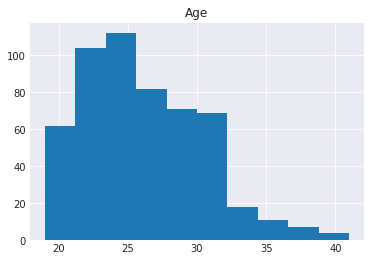

In [33]:
data_players.hist(column='Age')

In [34]:
#pd.pivot_table(data=players_above_8games, index='Age', values='Pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a707f19b0>]],
      dtype=object)

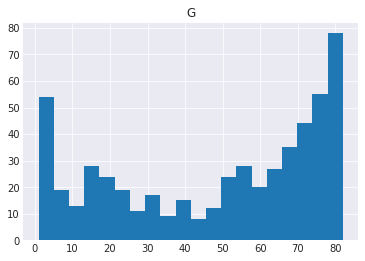

In [35]:
    data_players.hist(column='G', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ab40f4b38>]],
      dtype=object)

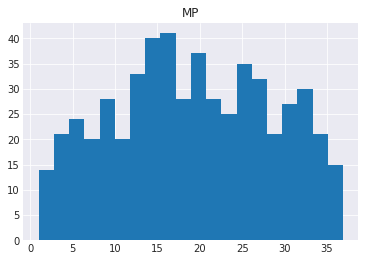

In [36]:
data_players.hist(column='MP', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456b0bb630>]],
      dtype=object)

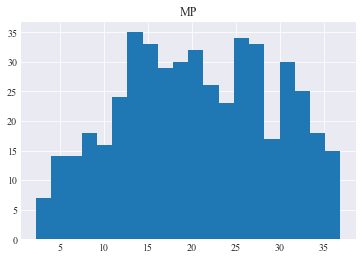

In [74]:
#players_above_8games.hist(column='MP', bins=20)

** Normalization in Pandas**

* to use mean normalization:

normalized_df=(df-df.mean())/df.std()

* to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())